# Overview

Descriptive statistical methods involve the use of statistical technique to quantitativly give a summary of the dataset. Some techniques will be use for the dataset:

Central tendency: including Mean, Median and Mode

Dispersion: range, standard deviation, variation

# Import

In [1]:
import pandas as pd
import numpy as np
import ast
import pprint

from pandasql import sqldf
pysqldf = lambda q:sqldf(q,globals())

In [2]:
events = pd.read_csv('/Users/liyuanxie/Desktop/DataAnalysis/SQL/athlete_events.csv')

In [4]:
events.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [33]:
def descriptive_stats (table_name, table_col):
    #count
    cnt = pysqldf (f"""SELECT "COUNT" as Stat, count({table_col}) as Value 
                        FROM {table_name};""")
    #mean
    mean = pysqldf (f"""SELECT "MEAN" as Stat, CAST(AVG({table_col}) as int) as Value
                        FROM {table_name};""")
    #median
    median = pysqldf (f"""SELECT "COUNT" as Stat, {table_col} as Value 
                        FROM {table_name}
                        ORDER BY {table_col}
                        limit 1
                        OFFSET (SELECT COUNT(*) FROM {table_name})/2;""")
    #mode
    mode = pysqldf (f"""SELECT "MODE" as Stat, {table_col} as Value, COUNT(*) as Count
                        FROM {table_name}
                        GROUP BY {table_col}
                        ORDER BY COUNT(*) DESC
                        limit 1;""")
    #min and max
    min = pysqldf (f"""SELECT "MIN" as Stat, MIN({table_col}) as Value 
                        FROM {table_name};""")
    max = pysqldf (f"""SELECT "MAX" as Stat, MAX({table_col}) as Value 
                        FROM {table_name};""")
    display(pd.concat(cnt, mean, median, min, max).set_index ("Stat"))
    display(mode.set_index("Stat"))
    print("")

## Test Hypothesis

In [58]:
year_cnt = pysqldf("SELECT year, COUNT(*) as cnt FROM events GROUP BY year ORDER BY year;" )

<AxesSubplot:xlabel='Year'>

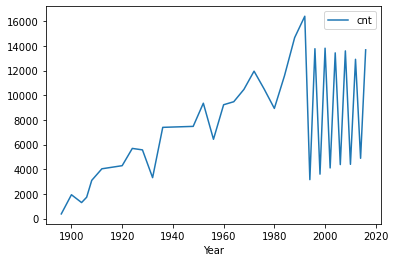

In [59]:
year_cnt.plot('Year','cnt')

Not more and more people participated in Olympics games. The max number of Athletes is in 1992.

In [62]:
pysqldf("SELECT sex, COUNT(*) as cnt FROM events GROUP BY sex;" )

,Sex,cnt
0,F,74522
1,M,196594


Yes, more male athletes then female athletes.

In [65]:
age_avg = pysqldf("SELECT year, AVG(age) as avg FROM events GROUP BY year ORDER BY year;" )

<AxesSubplot:xlabel='Year'>

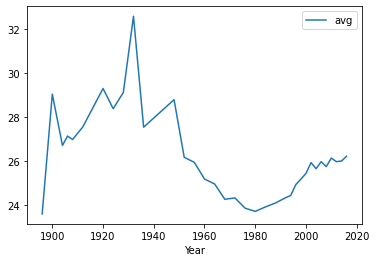

In [68]:
age_avg.plot('Year', 'avg')

The average age reach the lowest point in 1980.

## Next

Base on the average age result that I got from each Olympoc year, the average age is aroun 24-33 years old. 
Then the next step could test whether the age of an athlete has relationship to win a medal or not.